In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from collections import Counter
import warnings

py.init_notebook_mode(connected=True)
sns.set_style('darkgrid')
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('employee attrition.csv')

In [3]:
# def education(val):
#     if val == 1:
#         return 'Below College'
#     elif val == 2:
#         return 'College'
#     elif val == 3:
#         return 'Bachelor'
#     elif val == 4:
#         return 'Master'
#     else:
#         return 'Phd'
    
# data['Education'] = data['Education'].apply(education)

In [4]:
# def envSatisfaction(val):
#     if val == 1:
#         return 'Low'
#     elif val == 2:
#         return 'Medium'
#     elif val == 3:
#         return 'High'
#     else:
#         return 'Very High'
    
# data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].apply(envSatisfaction)

In [5]:
# def jobInvolvement(val):
#     if val == 1:
#         return 'Low'
#     elif val == 2:
#         return 'Medium'
#     elif val == 3:
#         return 'High'
#     else:
#         return 'Very High'
    
# data['JobInvolvement'] = data['JobInvolvement'].apply(jobInvolvement)

In [6]:
# def jobSatisfaction(val):
#     if val == 1:
#         return 'Low'
#     elif val == 2:
#         return 'Medium'
#     elif val == 3:
#         return 'High'
#     else:
#         return 'Very High'
    
# data['JobSatisfaction'] = data['JobSatisfaction'].apply(jobSatisfaction)

In [7]:
# def performRating(val):
#     if val == 1:
#         return 'Low'
#     elif val == 2:
#         return 'Good'
#     elif val == 3:
#         return 'Excellent'
#     else:
#         return 'Outstanding'
    
# data['PerformanceRating'] = data['PerformanceRating'].apply(performRating)

In [8]:
# def relationSatisfaction(val):
#     if val == 1:
#         return 'Low'
#     elif val == 2:
#         return 'Medium'
#     elif val == 3:
#         return 'High'
#     else:
#         return 'Very High'
    
# data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].apply(relationSatisfaction)

In [9]:
# def workLifeBalance(val):
#     if val == 1:
#         return 'Bad'
#     elif val == 2:
#         return 'Good'
#     elif val == 3:
#         return 'Better'
#     else:
#         return 'Best'
    
# data['WorkLifeBalance'] = data['WorkLifeBalance'].apply(workLifeBalance)

In [10]:
data['Attrition'] = data['Attrition'].apply(lambda val: 1 if val=='Yes' else 0)

In [11]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [14]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].unique()[:2])]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Age,int64,0,0.0,43,"[41, 49]"
1,Attrition,int64,0,0.0,2,"[1, 0]"
2,BusinessTravel,object,0,0.0,3,"[Travel_Rarely, Travel_Frequently]"
3,DailyRate,int64,0,0.0,886,"[1102, 279]"
4,Department,object,0,0.0,3,"[Sales, Research & Development]"
5,DistanceFromHome,int64,0,0.0,29,"[1, 8]"
6,Education,int64,0,0.0,5,"[2, 1]"
7,EducationField,object,0,0.0,6,"[Life Sciences, Other]"
8,EmployeeCount,int64,0,0.0,1,[1]
9,EmployeeNumber,int64,0,0.0,1470,"[1, 2]"


In [15]:
dfDesc[dfDesc['unique'] <= 1]

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
8,EmployeeCount,int64,0,0.0,1,[1]
21,Over18,object,0,0.0,1,[Y]
26,StandardHours,int64,0,0.0,1,[80]


In [16]:
data.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1 , inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked     

In [17]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].unique()[:2])]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Age,int64,0,0.0,43,"[41, 49]"
1,Attrition,int64,0,0.0,2,"[1, 0]"
2,BusinessTravel,object,0,0.0,3,"[Travel_Rarely, Travel_Frequently]"
3,DailyRate,int64,0,0.0,886,"[1102, 279]"
4,Department,object,0,0.0,3,"[Sales, Research & Development]"
5,DistanceFromHome,int64,0,0.0,29,"[1, 8]"
6,Education,int64,0,0.0,5,"[2, 1]"
7,EducationField,object,0,0.0,6,"[Life Sciences, Other]"
8,EnvironmentSatisfaction,int64,0,0.0,4,"[2, 3]"
9,Gender,object,0,0.0,2,"[Female, Male]"


In [18]:
data_num = data[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']]
data_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

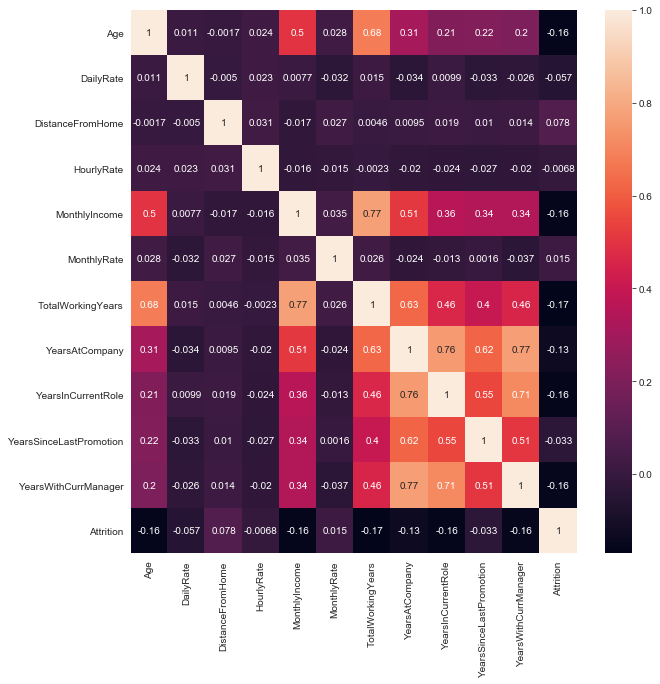

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True)

In [20]:
data_ordinal = data[dfDesc[dfDesc['dataType'] == 'int64']
                    ['dataFeatures'].values].drop(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)
data_ordinal.columns

Index(['Attrition', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance'],
      dtype='object')

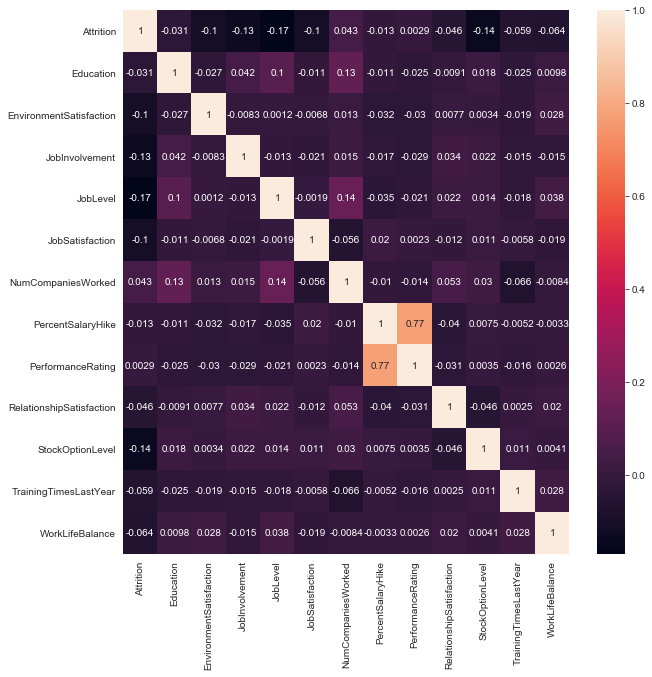

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data_ordinal.corr(),annot=True)

In [22]:
attrition = data[data['Attrition'] == 1]
no_attrition = data[data['Attrition'] == 0]

#-------------COUNT--------------
trace = go.Bar(x = ['Attrition','No Attrition'],
               y = (len(attrition), len(no_attrition)),
               opacity = 0.8,
               text = ('{}%'.format(round(len(attrition)/len(data['Attrition'])*100, 2)), 
                       '{}%'.format(round(len(no_attrition)/len(data['Attrition'])*100, 2))),
               textposition = 'outside',
               marker = dict(color=['#d65f5f','#82c6e2'],
                             line = dict(color = '#000000', width=2))
               )
layout = dict(title = 'Count of Attrition Variable')

fig = dict(data=[trace], layout=layout)
py.iplot(fig)

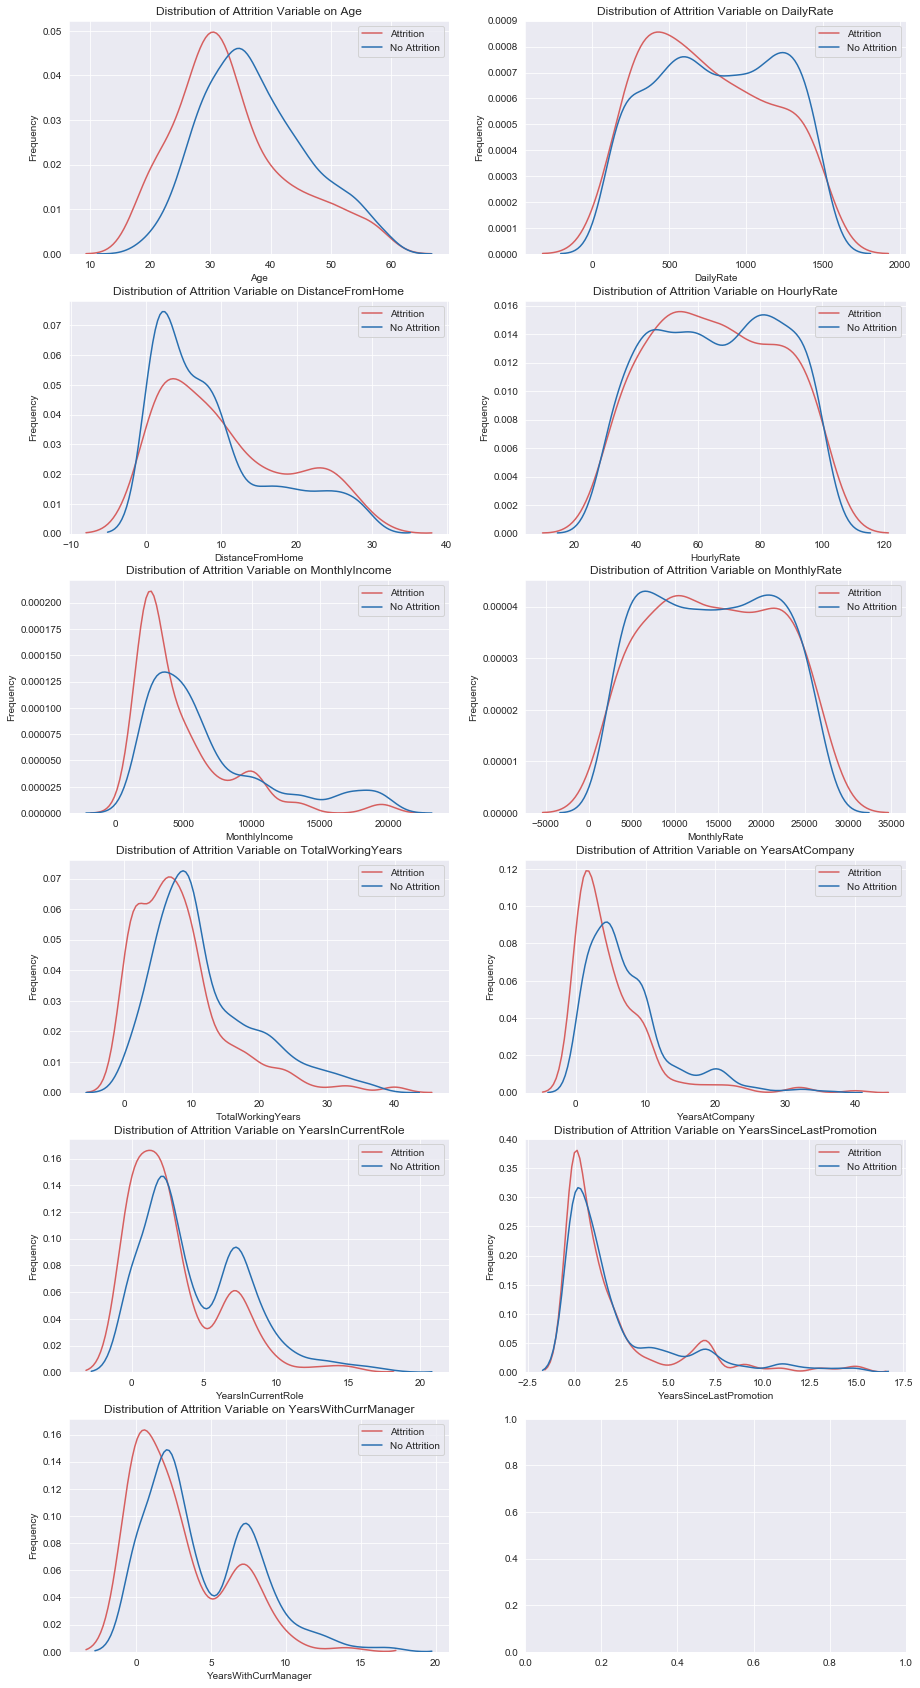

In [23]:
fig, axs = plt.subplots(6,2, figsize=(15,30))
columns = data_num.drop('Attrition',axis=1)
for col, num in zip(columns, range(1,len(columns)+1)):
    plt.subplot(6,2,num)
    sns.kdeplot(data[data['Attrition'] == 1][col], color='#d65f5f')
    sns.kdeplot(data[data['Attrition'] == 0][col], color='#286fb0')
    plt.legend(['Attrition','No Attrition'])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of Attrition Variable on ' + col)
plt.show()

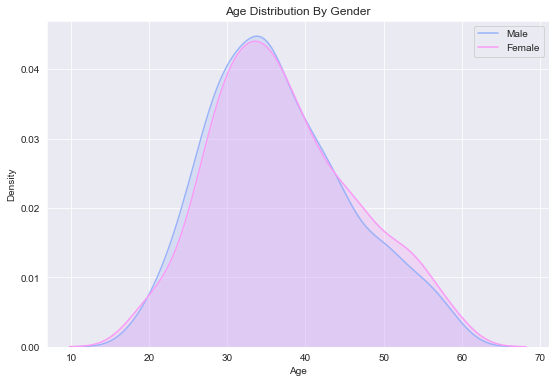

In [24]:
plt.figure(figsize=(9,6))
sns.kdeplot(data[data['Gender'] == 'Male']['Age'], color='#9ab2f9', shade=True)
sns.kdeplot(data[data['Gender'] == 'Female']['Age'], color='#f99af6', shade=True)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution By Gender')
plt.show()

In [25]:
trace1 = go.Bar(
    x= data[data['Gender'] == 'Male']['Attrition'].value_counts().index,
    y= data[data['Gender'] == 'Male']['Attrition'].value_counts(),
    name= 'Male',
    marker = dict(color=['#9ab2f9', '#9ab2f9'])
)

trace2 = go.Bar(
    x= data[data['Gender'] == 'Female']['Attrition'].value_counts().index,
    y= data[data['Gender'] == 'Female']['Attrition'].value_counts(),
    name= 'Female',
    marker = dict(color=['#f99af6', '#f99af6'])
)

layout = go.Layout(
    barmode='group',
    title = 'Level of Attrition By Gender',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Frequency')
)

fig = dict(data=[trace1, trace2], layout=layout)
py.iplot(fig)

In [26]:
trace1 = go.Histogram(
    x = data[data['Attrition'] == 1]['MonthlyIncome'],
    opacity = 0.6,
    marker = dict(color='#ff0000'),
    name = 'Attrition'
)

trace2 = go.Histogram(
    x = data[data['Attrition'] == 0]['MonthlyIncome'],
    opacity = 0.6,
    marker = dict(color='#1B5ABA'),
    name = 'Not Attrition'
)

layout = go.Layout(
    barmode = 'overlay',
    title = 'Distribution of Attrition by Monthly Income',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Frequency')
)

fig = dict(data=[trace1, trace2], layout=layout)
py.iplot(fig)

In [27]:
trace1 = go.Box(
    x= data[data['Gender'] == 'Male']['Attrition'],
    y= data[data['Gender'] == 'Male']['MonthlyIncome'],
    name= 'Male',
    marker = dict(color='#9ab2f9')
)

trace2 = go.Box(
    x= data[data['Gender'] == 'Female']['Attrition'],
    y= data[data['Gender'] == 'Female']['MonthlyIncome'],
    name= 'Female',
    marker = dict(color='#f99af6')
)

layout = go.Layout(
    title = 'Monthly Income Range By Gender',
    boxmode='group',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Monthly Income')
)

fig = dict(data=[trace1, trace2], layout=layout)
py.iplot(fig)

In [28]:
trace1 = go.Bar(
    x= data[data['Education'] == 1]['Attrition'].value_counts().index,
    y= data[data['Education'] == 1]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['Education'] == 1]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['Education'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['Education'] == 1]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['Education'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Bellow College',
    marker = dict(color=['#1bba8a', '#1bba8a'])
)

trace2 = go.Bar(
    x= data[data['Education'] == 2]['Attrition'].value_counts().index,
    y= data[data['Education'] == 2]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['Education'] == 2]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['Education'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['Education'] == 2]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['Education'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'College',
    marker = dict(color=['#159595', '#159595'])
)

trace3 = go.Bar(
    x= data[data['Education'] == 3]['Attrition'].value_counts().index,
    y= data[data['Education'] == 3]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['Education'] == 3]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['Education'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['Education'] == 3]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['Education'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Bachelor',
    marker = dict(color=['#1877a8', '#1877a8'])
)

trace4 = go.Bar(
    x= data[data['Education'] == 4]['Attrition'].value_counts().index,
    y= data[data['Education'] == 4]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['Education'] == 4]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['Education'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['Education'] == 4]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['Education'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Master',
    marker = dict(color=['#1B5ABA', '#1B5ABA'])
)

trace5 = go.Bar(
    x= data[data['Education'] == 5]['Attrition'].value_counts().index,
    y= data[data['Education'] == 5]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['Education'] == 5]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['Education'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['Education'] == 5]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['Education'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Phd',
    marker = dict(color=['#1D3DCD', '#1D3DCD'])
)

layout = go.Layout(
    barmode='group',
    title = 'Level of Attrition By Education',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Frequency')
)

fig = dict(data=[trace1, trace2, trace3, trace4, trace5], layout=layout)
py.iplot(fig)

In [29]:
trace1 = go.Bar(
    x= data[data['JobSatisfaction'] == 1]['Attrition'].value_counts().index,
    y= data[data['JobSatisfaction'] == 1]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['JobSatisfaction'] == 1]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['JobSatisfaction'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['JobSatisfaction'] == 1]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['JobSatisfaction'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Low',
    marker = dict(color=['#1bba8a', '#1bba8a'])
)

trace2 = go.Bar(
    x= data[data['JobSatisfaction'] == 2]['Attrition'].value_counts().index,
    y= data[data['JobSatisfaction'] == 2]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['JobSatisfaction'] == 2]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['JobSatisfaction'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['JobSatisfaction'] == 2]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['JobSatisfaction'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Medium',
    marker = dict(color=['#159595', '#159595'])
)

trace3 = go.Bar(
    x= data[data['JobSatisfaction'] == 3]['Attrition'].value_counts().index,
    y= data[data['JobSatisfaction'] == 3]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['JobSatisfaction'] == 3]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['JobSatisfaction'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['JobSatisfaction'] == 3]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['JobSatisfaction'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'High',
    marker = dict(color=['#1877a8', '#1877a8'])
)

trace4 = go.Bar(
    x= data[data['JobSatisfaction'] == 4]['Attrition'].value_counts().index,
    y= data[data['JobSatisfaction'] == 4]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['JobSatisfaction'] == 4]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['JobSatisfaction'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['JobSatisfaction'] == 4]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['JobSatisfaction'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Very High',
    marker = dict(color=['#1B5ABA', '#1B5ABA'])
)

layout = go.Layout(
    barmode='group',
    title = 'Level of Attrition By Job Satisfaction',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Frequency')
)

fig = dict(data=[trace1, trace2, trace3, trace4], layout=layout)
py.iplot(fig)

In [30]:
trace1 = go.Box(
    x= data[data['JobSatisfaction'] == 1]['Attrition'],
    y= data[data['JobSatisfaction'] == 1]['MonthlyIncome'],
    name= 'Low',
    marker = dict(color='#1bba8a')
)

trace2 = go.Box(
    x= data[data['JobSatisfaction'] == 2]['Attrition'],
    y= data[data['JobSatisfaction'] == 2]['MonthlyIncome'],
    name= 'Medium',
    marker = dict(color='#159595')
)

trace3 = go.Box(
    x= data[data['JobSatisfaction'] == 3]['Attrition'],
    y= data[data['JobSatisfaction'] == 3]['MonthlyIncome'],
    name= 'High',
    marker = dict(color='#1877a8')
)

trace4 = go.Box(
    x= data[data['JobSatisfaction'] == 4]['Attrition'],
    y= data[data['JobSatisfaction'] == 4]['MonthlyIncome'],
    name= 'Very High',
    marker = dict(color='#1B5ABA')
)

layout = go.Layout(
    title = 'Monthly Income Range By Job Satisfaction',
    boxmode='group',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Monthly Income')
)

fig = dict(data=[trace1, trace2, trace3, trace4], layout=layout)
py.iplot(fig)

In [31]:
data['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [32]:
trace1 = go.Bar(
    x= data[data['PerformanceRating'] == 1]['Attrition'].value_counts().index,
    y= data[data['PerformanceRating'] == 1]['Attrition'].value_counts(),
    name= 'Low',
    marker = dict(color=['#1bba8a', '#1bba8a'])
)

trace2 = go.Bar(
    x= data[data['PerformanceRating'] == 2]['Attrition'].value_counts().index,
    y= data[data['PerformanceRating'] == 2]['Attrition'].value_counts(),
    name= 'Good',
    marker = dict(color=['#1877a8', '#1877a8'])
)

trace3 = go.Bar(
    x= data[data['PerformanceRating'] == 3]['Attrition'].value_counts().index,
    y= data[data['PerformanceRating'] == 3]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['PerformanceRating'] == 3]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['PerformanceRating'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['PerformanceRating'] == 3]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['PerformanceRating'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Excellent',
    marker = dict(color=['#159595', '#159595'])
)

trace4 = go.Bar(
    x= data[data['PerformanceRating'] == 4]['Attrition'].value_counts().index,
    y= data[data['PerformanceRating'] == 4]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['PerformanceRating'] == 4]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['PerformanceRating'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['PerformanceRating'] == 4]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['PerformanceRating'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Outstanding',
    marker = dict(color=['#1B5ABA', '#1B5ABA'])
)

layout = go.Layout(
    barmode='group',
    title = 'Level of Attrition By Performance Rating',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Frequency')
)

fig = dict(data=[trace1, trace2, trace3, trace4], layout=layout)
py.iplot(fig)

In [33]:
trace1 = go.Bar(
    x= data[data['OverTime'] == 'Yes']['Attrition'].value_counts().index,
    y= data[data['OverTime'] == 'Yes']['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['OverTime'] == 'Yes']['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['OverTime'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['OverTime'] == 'Yes']['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['OverTime'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Overtime',
    marker = dict(color=['#ff3333', '#ff3333'])
)

trace2 = go.Bar(
    x= data[data['OverTime'] == 'No']['Attrition'].value_counts().index,
    y= data[data['OverTime'] == 'No']['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['OverTime'] == 'No']['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['OverTime'].value_counts())*100, 2)),
            '{}%'.format(round(data[data['OverTime'] == 'No']['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['OverTime'].value_counts())*100, 2)), 
           ),
    textposition = 'outside',
    name= 'Not Overtime',
    marker = dict(color=['#ff9933', '#ff9933'])
)

layout = go.Layout(
    barmode='group',
    title = 'Level of Attrition By Overtime Status',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Frequency')
)

fig = dict(data=[trace1, trace2], layout=layout)
py.iplot(fig)

In [34]:
trace1 = go.Bar(
    x= data[data['WorkLifeBalance'] == 1]['Attrition'].value_counts().index,
    y= data[data['WorkLifeBalance'] == 1]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['WorkLifeBalance'] == 1]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['WorkLifeBalance'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['WorkLifeBalance'] == 1]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['WorkLifeBalance'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Bad',
    marker = dict(color=['#ffc30f', '#ffc30f'])
)

trace2 = go.Bar(
    x= data[data['WorkLifeBalance'] == 2]['Attrition'].value_counts().index,
    y= data[data['WorkLifeBalance'] == 2]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['WorkLifeBalance'] == 2]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['WorkLifeBalance'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['WorkLifeBalance'] == 2]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['WorkLifeBalance'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Good',
    marker = dict(color=['#ff5733', '#ff5733'])
)

trace3 = go.Bar(
    x= data[data['WorkLifeBalance'] == 3]['Attrition'].value_counts().index,
    y= data[data['WorkLifeBalance'] == 3]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['WorkLifeBalance'] == 3]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['WorkLifeBalance'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['WorkLifeBalance'] == 3]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['WorkLifeBalance'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Better',
    marker = dict(color=['#c70039', '#c70039'])
)

trace4 = go.Bar(
    x= data[data['WorkLifeBalance'] == 4]['Attrition'].value_counts().index,
    y= data[data['WorkLifeBalance'] == 4]['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['WorkLifeBalance'] == 4]['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['WorkLifeBalance'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['WorkLifeBalance'] == 4]['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['WorkLifeBalance'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Best',
    marker = dict(color=['#900c3f', '#900c3f'])
)

layout = go.Layout(
    barmode='group',
    title = 'Level of Attrition By Work Life Balance',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Frequency')
)

fig = dict(data=[trace1, trace2, trace3, trace4], layout=layout)
py.iplot(fig)

In [35]:
trace1 = go.Bar(
    x= data[data['BusinessTravel'] == 'Non-Travel']['Attrition'].value_counts().index,
    y= data[data['BusinessTravel'] == 'Non-Travel']['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['BusinessTravel'] == 'Non-Travel']['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['BusinessTravel'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['BusinessTravel'] == 'Non-Travel']['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['BusinessTravel'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Non Travel',
    marker = dict(color=['#ffc30f', '#ffc30f'])
)

trace2 = go.Bar(
    x= data[data['BusinessTravel'] == 'Travel_Rarely']['Attrition'].value_counts().index,
    y= data[data['BusinessTravel'] == 'Travel_Rarely']['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['BusinessTravel'] == 'Travel_Rarely']['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['BusinessTravel'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['BusinessTravel'] == 'Travel_Rarely']['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['BusinessTravel'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Travel Rarely',
    marker = dict(color=['#ff5733', '#ff5733'])
)

trace3 = go.Bar(
    x= data[data['BusinessTravel'] == 'Travel_Frequently']['Attrition'].value_counts().index,
    y= data[data['BusinessTravel'] == 'Travel_Frequently']['Attrition'].value_counts(),
    text = ('{}%'.format(round(data[data['BusinessTravel'] == 'Travel_Frequently']['Attrition'].value_counts().iloc[0]/
                               sum(data[data['Attrition'] == 0]['BusinessTravel'].value_counts())*100, 2)), 
            '{}%'.format(round(data[data['BusinessTravel'] == 'Travel_Frequently']['Attrition'].value_counts().iloc[1]/
                               sum(data[data['Attrition'] == 1]['BusinessTravel'].value_counts())*100, 2))
           ),
    textposition = 'outside',
    name= 'Travel Frequently',
    marker = dict(color=['#c70039', '#c70039'])
)


layout = go.Layout(
    barmode='group',
    title = 'Level of Attrition By Business Travel',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Frequency')
)

fig = dict(data=[trace1, trace2, trace3], layout=layout)
py.iplot(fig)

In [36]:
trace1 = go.Box(
    y= data[data['Attrition'] == 0]['MonthlyIncome'],
    name= 'Not Attrition',
    marker = dict(color='#1bba8a')
)

trace2 = go.Box(
    y= data[data['Attrition'] == 1]['MonthlyIncome'],
    name= 'Attrition',
    marker = dict(color='#ffc30f')
)

layout = go.Layout(
    title = 'Monthly Income Range',
    boxmode='group',
    xaxis = dict(title='Attrition'),
    yaxis = dict(title='Monthly Income')
)

fig = dict(data=[trace1, trace2], layout=layout)
py.iplot(fig)

# One Hot Encoding / Get Dummies

In [37]:
categorical_columns = dfDesc[dfDesc['dataType'] == 'O']['dataFeatures'].values

In [38]:
# data = pd.get_dummies(data, drop_first = True, columns=categorical_columns)
# data.head()

# Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])
    
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


# Standard Scaler

In [41]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# dataScaled = pd.DataFrame(scaler.fit_transform(data.drop('Attrition', axis=1)), columns= data.drop('Attrition', axis=1).columns)
# dataScaled['Attrition'] = data['Attrition']
# dataScaled.head()

In [42]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# PCA

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.drop('Attrition', axis=1))

In [44]:
pca.explained_variance_

array([50710722.58429234, 22117267.60480523])

In [45]:
pca.explained_variance_ratio_

array([0.69475033, 0.30301242])

In [46]:
X_pca.shape

(1470, 2)

In [47]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [48]:
target = data['Attrition']
# data = pd.DataFrame(X_pca)
data = data.drop('Attrition', axis=1)

# MACHINE LEARNING MODELING

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, matthews_corrcoef, f1_score, log_loss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, SVMSMOTE, ADASYN
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold

In [50]:
def calc_train_error(X_train, y_train, model):
    # return in-sample error for already fit model
    
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    classreport = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train, predictProba)
    return {
        'classreport' : classreport,
        'matthews' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    # return out of sample error for already fit model
    
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    classreport = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return {
        'classreport' : classreport,
        'matthews' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    # fits model and returns the classification metrics for in sample error and out of sample error
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

# Logistic Regression

In [51]:
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

In [52]:
# parameters = {'class_weight' : ({0:1, 1:3}, {0:1, 1:4}, {0:1, 1:5})}
# logreg = LogisticRegression()
# gs = GridSearchCV(logreg, parameters,
#                  scoring = ['roc_auc','recall'],
#                  refit='roc_auc', cv = 5)
# gs.fit(X_train, y_train)
# gs.best_estimator_

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [54]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
#     ros = RandomOverSampler(random_state=101)
#     X_train, y_train = ros.fit_sample(X_train, y_train)
    smot = SMOTE(random_state=101)
    X_train, y_train = smot.fit_sample(X_train, y_train)
    
    #instantiate model
    logreg = LogisticRegression()
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logreg)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [55]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
dfReport = pd.DataFrame(data=listItem, 
                        columns=['Train Accuracy','Test Accuracy','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])

dfReport

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,0.822086,0.799320,0.900111,0.746908,0.822086,0.657971,0.644172,0.342346,0.405851,0.436004
1,0.815494,0.799320,0.892445,0.812453,0.815487,0.681110,0.631036,0.395341,0.419773,0.429561
2,0.803535,0.758503,0.878504,0.783426,0.803527,0.665540,0.607123,0.367478,0.441302,0.523606
3,0.842292,0.758503,0.917574,0.724180,0.842289,0.621210,0.684613,0.257341,0.372071,0.514649
4,0.835005,0.761905,0.915644,0.695865,0.835005,0.642311,0.670010,0.286373,0.377330,0.546199


In [56]:
for i, tr in zip(range(1,6), train_errors):
    print('Report Train ke ' + str(i) + ' : ')
    print(tr['classreport'])

Report Train ke 1 : 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       978
           1       0.82      0.82      0.82       978

   micro avg       0.82      0.82      0.82      1956
   macro avg       0.82      0.82      0.82      1956
weighted avg       0.82      0.82      0.82      1956

Report Train ke 2 : 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       981
           1       0.81      0.82      0.82       981

   micro avg       0.82      0.82      0.82      1962
   macro avg       0.82      0.82      0.82      1962
weighted avg       0.82      0.82      0.82      1962

Report Train ke 3 : 
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       990
           1       0.80      0.81      0.80       990

   micro avg       0.80      0.80      0.80      1980
   macro avg       0.80      0.80      0.80      1980
weighted av

In [57]:
for i, val in zip(range(1,6), validation_errors):
    print('Report Validation ke ' + str(i) + ' : ')
    print(val['classreport'])

Report Validation ke 1 : 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       255
           1       0.35      0.59      0.44        39

   micro avg       0.80      0.80      0.80       294
   macro avg       0.64      0.71      0.66       294
weighted avg       0.85      0.80      0.82       294

Report Validation ke 2 : 
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       252
           1       0.38      0.67      0.49        42

   micro avg       0.80      0.80      0.80       294
   macro avg       0.66      0.74      0.68       294
weighted avg       0.86      0.80      0.82       294

Report Validation ke 3 : 
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       243
           1       0.39      0.67      0.49        51

   micro avg       0.76      0.76      0.76       294
   macro avg       0.65      0.72      0.67       

Cross Validation Scores : [0.65       0.72       0.87       0.875      0.845      0.85
 0.82       0.83333333 0.85858586 0.86868687]


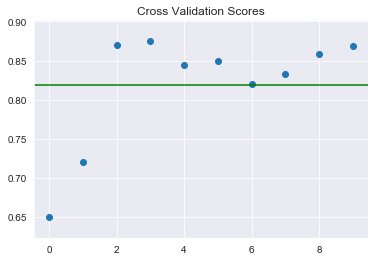

In [58]:
scores = cross_val_score(estimator = logreg,
                        X= X_train,
                        y= y_train,
                        cv=10,
                        n_jobs=1)
print('Cross Validation Scores : %s' % scores)

plt.title('Cross Validation Scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g')
plt.show()

# Decision Tree

In [59]:
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

In [60]:
# parameters = {'class_weight' : ({0:1, 1:3}, {0:1, 1:4}, {0:1, 1:5}), 'min_samples_leaf' : (65,55,60)}
# dt = DecisionTreeClassifier()
# gs = GridSearchCV(dt, parameters,
#                  scoring = ['roc_auc','recall'],
#                  refit='roc_auc', cv = 10)
# gs.fit(X_train, y_train)
# gs.best_estimator_

In [61]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [62]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
#     ros = RandomOverSampler(random_state=101)
#     X_train, y_train = ros.fit_sample(X_train, y_train)
#     smot = SMOTE(random_state=101)
#     X_train, y_train = smot.fit_sample(X_train, y_train)
    
    #instantiate model
    dt = DecisionTreeClassifier(class_weight={0:1, 1:3}, min_samples_leaf=10)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, dt)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [63]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
dfReport = pd.DataFrame(data=listItem, 
                        columns=['Train Accuracy','Test Accuracy','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])

dfReport

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,0.852891,0.697279,0.941868,0.602514,0.784348,0.525178,0.600208,0.082971,0.256599,2.474844
1,0.859694,0.772109,0.939277,0.646022,0.787005,0.605685,0.597979,0.222584,0.262015,2.446389
2,0.842687,0.724490,0.930759,0.721819,0.766750,0.614579,0.574174,0.258309,0.271530,2.016614
3,0.857993,0.734694,0.935558,0.676372,0.784423,0.601432,0.597930,0.225669,0.265146,2.029375
4,0.871599,0.758503,0.936878,0.653054,0.789290,0.643466,0.597996,0.290171,0.258610,3.299875


In [64]:
for i, tr in zip(range(1,6), train_errors):
    print('Report Train ke ' + str(i) + ' : ')
    print(tr['classreport'])

Report Train ke 1 : 
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       978
           1       0.54      0.86      0.66       198

   micro avg       0.85      0.85      0.85      1176
   macro avg       0.75      0.86      0.78      1176
weighted avg       0.90      0.85      0.86      1176

Report Train ke 2 : 
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       981
           1       0.55      0.83      0.66       195

   micro avg       0.86      0.86      0.86      1176
   macro avg       0.76      0.85      0.79      1176
weighted avg       0.89      0.86      0.87      1176

Report Train ke 3 : 
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       990
           1       0.50      0.86      0.63       186

   micro avg       0.84      0.84      0.84      1176
   macro avg       0.74      0.85      0.77      1176
weighted av

In [65]:
for i, val in zip(range(1,6), validation_errors):
    print('Report Validation ke ' + str(i) + ' : ')
    print(val['classreport'])

Report Validation ke 1 : 
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       255
           1       0.18      0.36      0.24        39

   micro avg       0.70      0.70      0.70       294
   macro avg       0.53      0.55      0.53       294
weighted avg       0.79      0.70      0.74       294

Report Validation ke 2 : 
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       252
           1       0.30      0.43      0.35        42

   micro avg       0.77      0.77      0.77       294
   macro avg       0.60      0.63      0.61       294
weighted avg       0.81      0.77      0.79       294

Report Validation ke 3 : 
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       243
           1       0.33      0.55      0.41        51

   micro avg       0.72      0.72      0.72       294
   macro avg       0.61      0.66      0.61       

Cross Validation Scores : [0.8220339  0.77966102 0.68644068 0.77118644 0.76271186 0.80508475
 0.77966102 0.76068376 0.82905983 0.77586207]


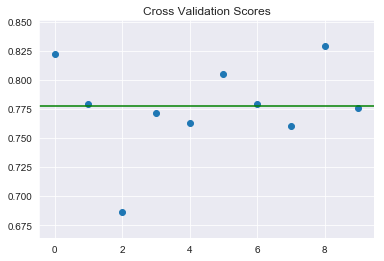

In [66]:
scores = cross_val_score(estimator = dt,
                        X= X_train,
                        y= y_train,
                        cv=10,
                        n_jobs=1)
print('Cross Validation Scores : %s' % scores)

plt.title('Cross Validation Scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g')
plt.show()

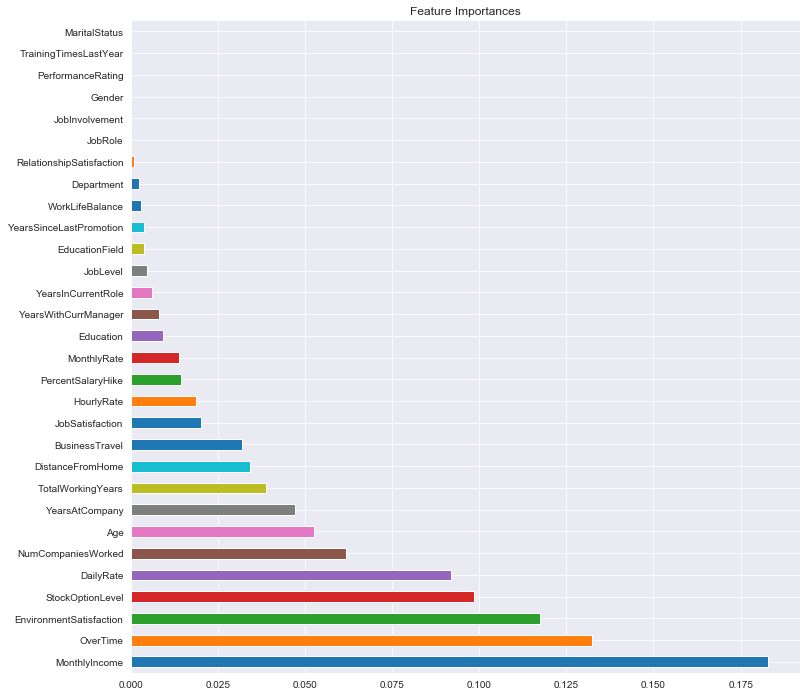

In [67]:
coef1 = pd.Series(dt.feature_importances_, data.columns).sort_values(ascending = False)
plt.figure(figsize=(12,12))
coef1.plot(kind='barh', title='Feature Importances')

# Random Forest

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

In [69]:
# parameters = {'class_weight': ({0:1, 1:4.2}, {0:1, 1:4}, {0:1, 1:4.3}), 
#               'min_samples_leaf': (10,11,9,8,7,6,5),
#               'min_samples_split': (2,3,4,5),
#               'criterion': ('gini','entropy')}
# rfc = RandomForestClassifier(n_estimators=50, random_state=3)
# gs = GridSearchCV(rfc, parameters,
#                  scoring = ['roc_auc','recall'],
#                  refit='roc_auc', cv = 10)
# gs.fit(X_train, y_train)
# gs.best_estimator_

In [70]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [71]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
#     ros = RandomOverSampler(random_state=101)
#     X_train, y_train = ros.fit_sample(X_train, y_train)
#     smot = SMOTE(random_state=101)
#     X_train, y_train = smot.fit_sample(X_train, y_train)
    
    #instantiate model
    rfc = RandomForestClassifier(n_estimators=50, random_state=3, criterion='gini', 
                                 class_weight={0:1, 1:50}, min_samples_leaf=10)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, rfc)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [72]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
dfReport = pd.DataFrame(data=listItem, 
                        columns=['Train Accuracy','Test Accuracy','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])

dfReport

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,0.755952,0.625850,0.973890,0.701056,0.703918,0.531386,0.537071,0.196850,0.521023,0.639182
1,0.720238,0.663265,0.971128,0.783730,0.670475,0.586016,0.497326,0.317398,0.545626,0.625879
2,0.772959,0.707483,0.970392,0.771807,0.712581,0.621701,0.544773,0.303759,0.520005,0.589469
3,0.761054,0.615646,0.982380,0.764579,0.704356,0.556963,0.537060,0.271672,0.521771,0.677669
4,0.751701,0.608844,0.971770,0.787697,0.689603,0.573165,0.518398,0.294323,0.535698,0.648851


In [73]:
for i, tr in zip(range(1,6), train_errors):
    print('Report Train ke ' + str(i) + ' : ')
    print(tr['classreport'])

Report Train ke 1 : 
              precision    recall  f1-score   support

           0       1.00      0.71      0.83       978
           1       0.41      1.00      0.58       198

   micro avg       0.76      0.76      0.76      1176
   macro avg       0.70      0.85      0.70      1176
weighted avg       0.90      0.76      0.79      1176

Report Train ke 2 : 
              precision    recall  f1-score   support

           0       1.00      0.66      0.80       981
           1       0.37      1.00      0.54       195

   micro avg       0.72      0.72      0.72      1176
   macro avg       0.69      0.83      0.67      1176
weighted avg       0.90      0.72      0.76      1176

Report Train ke 3 : 
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       990
           1       0.41      0.99      0.58       186

   micro avg       0.77      0.77      0.77      1176
   macro avg       0.70      0.86      0.71      1176
weighted av

In [74]:
for i, val in zip(range(1,6), validation_errors):
    print('Report Validation ke ' + str(i) + ' : ')
    print(val['classreport'])

Report Validation ke 1 : 
              precision    recall  f1-score   support

           0       0.92      0.62      0.74       255
           1       0.21      0.67      0.32        39

   micro avg       0.63      0.63      0.63       294
   macro avg       0.57      0.64      0.53       294
weighted avg       0.83      0.63      0.69       294

Report Validation ke 2 : 
              precision    recall  f1-score   support

           0       0.95      0.64      0.76       252
           1       0.27      0.81      0.41        42

   micro avg       0.66      0.66      0.66       294
   macro avg       0.61      0.72      0.59       294
weighted avg       0.86      0.66      0.71       294

Report Validation ke 3 : 
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       243
           1       0.33      0.67      0.44        51

   micro avg       0.71      0.71      0.71       294
   macro avg       0.62      0.69      0.62       

Cross Validation Scores : [0.61864407 0.68644068 0.73728814 0.6440678  0.62711864 0.69491525
 0.69491525 0.62393162 0.71794872 0.74137931]


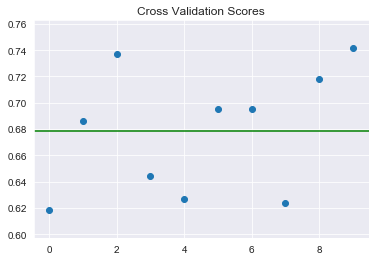

In [75]:
scores = cross_val_score(estimator = rfc,
                        X= X_train,
                        y= y_train,
                        cv=10,
                        n_jobs=1)
print('Cross Validation Scores : %s' % scores)

plt.title('Cross Validation Scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g')
plt.show()

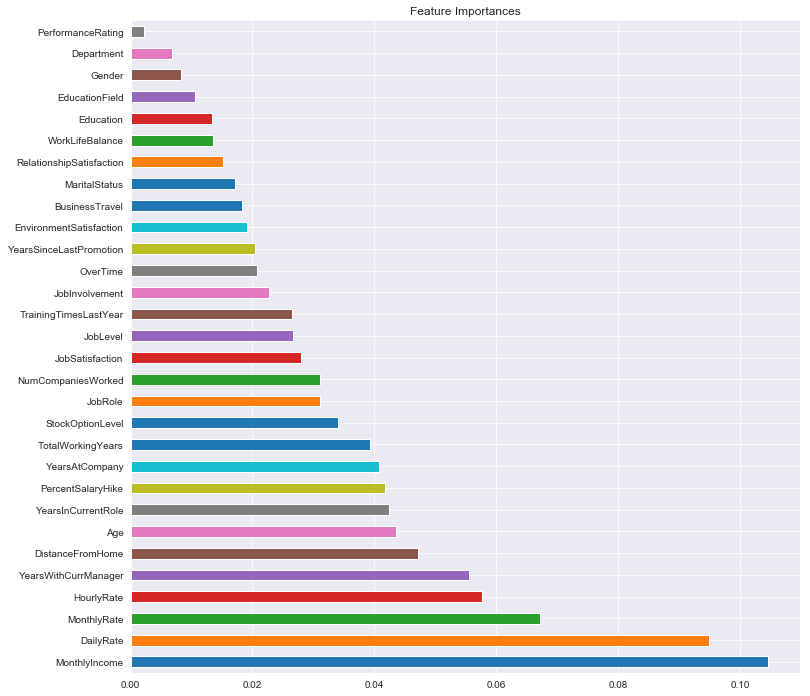

In [76]:
coef1 = pd.Series(rfc.feature_importances_, data.columns).sort_values(ascending = False)
plt.figure(figsize=(12,12))
coef1.plot(kind='barh', title='Feature Importances')

# K Nearest Neighbors

In [77]:
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

In [78]:
# parameters = {'n_neighbors': (20,21,22,23,24),
#               'algorithm': ('auto','ball_tree','kd_tree','brute')}
# knn = KNeighborsClassifier()
# gs = GridSearchCV(knn, parameters,
#                  scoring = ['roc_auc','recall'],
#                  refit='roc_auc', cv = 10)
# gs.fit(X_train, y_train)
# gs.best_estimator_

In [79]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [80]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
    ros = RandomOverSampler(random_state=3)
    X_train, y_train = ros.fit_sample(X_train, y_train)
#     smot = SMOTE(random_state=101)
#     X_train, y_train = smot.fit_sample(X_train, y_train)
#     adasyn = ADASYN(random_state=101)
#     X_train, y_train = adasyn.fit_sample(X_train, y_train)
    
    #instantiate model
    knn = KNeighborsClassifier(n_neighbors=25)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, knn)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [81]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
dfReport = pd.DataFrame(data=listItem, 
                        columns=['Train Accuracy','Test Accuracy','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])

dfReport

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,0.726483,0.602041,0.799779,0.556611,0.723385,0.483164,0.463465,0.059221,0.535455,0.885708
1,0.680938,0.676871,0.774021,0.654998,0.680483,0.561091,0.362910,0.195911,0.556400,0.954288
2,0.704545,0.585034,0.773347,0.638264,0.701886,0.517488,0.416590,0.143092,0.566205,0.898730
3,0.699290,0.544218,0.775216,0.643122,0.696958,0.489821,0.404861,0.145964,0.559936,0.812061
4,0.708626,0.554422,0.784732,0.595704,0.708018,0.480348,0.419001,0.023170,0.550069,0.913516


In [82]:
for i, tr in zip(range(1,6), train_errors):
    print('Report Train ke ' + str(i) + ' : ')
    print(tr['classreport'])

Report Train ke 1 : 
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       978
           1       0.69      0.83      0.75       978

   micro avg       0.73      0.73      0.73      1956
   macro avg       0.74      0.73      0.72      1956
weighted avg       0.74      0.73      0.72      1956

Report Train ke 2 : 
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       981
           1       0.67      0.72      0.69       981

   micro avg       0.68      0.68      0.68      1962
   macro avg       0.68      0.68      0.68      1962
weighted avg       0.68      0.68      0.68      1962

Report Train ke 3 : 
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       990
           1       0.67      0.80      0.73       990

   micro avg       0.70      0.70      0.70      1980
   macro avg       0.71      0.70      0.70      1980
weighted av

In [83]:
for i, val in zip(range(1,6), validation_errors):
    print('Report Validation ke ' + str(i) + ' : ')
    print(val['classreport'])

Report Validation ke 1 : 
              precision    recall  f1-score   support

           0       0.88      0.62      0.73       255
           1       0.16      0.46      0.24        39

   micro avg       0.60      0.60      0.60       294
   macro avg       0.52      0.54      0.48       294
weighted avg       0.79      0.60      0.67       294

Report Validation ke 2 : 
              precision    recall  f1-score   support

           0       0.91      0.69      0.79       252
           1       0.24      0.57      0.34        42

   micro avg       0.68      0.68      0.68       294
   macro avg       0.57      0.63      0.56       294
weighted avg       0.81      0.68      0.72       294

Report Validation ke 3 : 
              precision    recall  f1-score   support

           0       0.88      0.58      0.70       243
           1       0.23      0.61      0.34        51

   micro avg       0.59      0.59      0.59       294
   macro avg       0.55      0.59      0.52       

Cross Validation Scores : [0.64       0.69       0.675      0.64       0.645      0.665
 0.67       0.69191919 0.69191919 0.63131313]


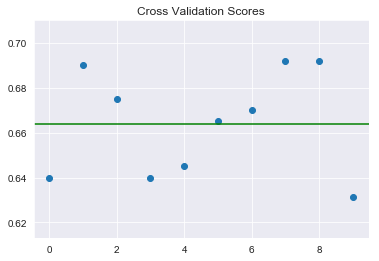

In [84]:
scores = cross_val_score(estimator = knn,
                        X= X_train,
                        y= y_train,
                        cv=10,
                        n_jobs=1)
print('Cross Validation Scores : %s' % scores)

plt.title('Cross Validation Scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g')
plt.show()

# Gradient Boosting Classifier

In [85]:
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

In [86]:
# parameters = {'n_estimators': (140,130,120),
#               'learning_rate': (0.9,0.8)}
# gbc = GradientBoostingClassifier(random_state=3)
# gs = GridSearchCV(gbc, parameters,
#                  scoring = ['roc_auc','recall'],
#                  refit='roc_auc', cv = 10)
# gs.fit(X_train, y_train)
# gs.best_estimator_

In [87]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [88]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
#     ros = RandomOverSampler(random_state=3)
#     X_train, y_train = ros.fit_sample(X_train, y_train)
    smot = SMOTE(sampling_strategy='minority', random_state=7)
    X_train, y_train = smot.fit_sample(X_train, y_train)
#     X_val, y_val = smot.fit_sample(X_val, y_val)
    
    #instantiate model
    gbc = GradientBoostingClassifier(n_estimators=220)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, gbc)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [89]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
dfReport = pd.DataFrame(data=listItem, 
                        columns=['Train Accuracy','Test Accuracy','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])

dfReport

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,0.985685,0.857143,0.998673,0.792056,0.985685,0.689593,0.971370,0.379186,0.113554,0.350633
1,0.980122,0.843537,0.998117,0.811413,0.980122,0.667224,0.960249,0.335272,0.124742,0.354570
2,0.986364,0.850340,0.999150,0.792625,0.986364,0.721423,0.972732,0.445900,0.104063,0.412871
3,0.988844,0.823129,0.999038,0.764751,0.988844,0.658902,0.977706,0.318487,0.101228,0.418982
4,0.985456,0.819728,0.998833,0.737653,0.985456,0.678131,0.970925,0.367916,0.103958,0.491457


In [90]:
for i, tr in zip(range(1,6), train_errors):
    print('Report Train ke ' + str(i) + ' : ')
    print(tr['classreport'])

Report Train ke 1 : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       0.99      0.99      0.99       978

   micro avg       0.99      0.99      0.99      1956
   macro avg       0.99      0.99      0.99      1956
weighted avg       0.99      0.99      0.99      1956

Report Train ke 2 : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       981
           1       0.98      0.98      0.98       981

   micro avg       0.98      0.98      0.98      1962
   macro avg       0.98      0.98      0.98      1962
weighted avg       0.98      0.98      0.98      1962

Report Train ke 3 : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       990
           1       0.98      0.99      0.99       990

   micro avg       0.99      0.99      0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted av

In [91]:
for i, val in zip(range(1,6), validation_errors):
    print('Report Validation ke ' + str(i) + ' : ')
    print(val['classreport'])

Report Validation ke 1 : 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       255
           1       0.46      0.46      0.46        39

   micro avg       0.86      0.86      0.86       294
   macro avg       0.69      0.69      0.69       294
weighted avg       0.86      0.86      0.86       294

Report Validation ke 2 : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       252
           1       0.45      0.40      0.43        42

   micro avg       0.84      0.84      0.84       294
   macro avg       0.67      0.66      0.67       294
weighted avg       0.84      0.84      0.84       294

Report Validation ke 3 : 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       243
           1       0.58      0.49      0.53        51

   micro avg       0.85      0.85      0.85       294
   macro avg       0.74      0.71      0.72       

Cross Validation Scores : [0.73       0.785      0.97       0.945      0.94       0.945
 0.92       0.95454545 0.94444444 0.95454545]


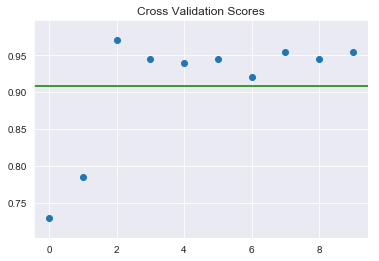

In [92]:
scores = cross_val_score(estimator = gbc,
                        X= X_train,
                        y= y_train,
                        cv=10,
                        n_jobs=1)
print('Cross Validation Scores : %s' % scores)

plt.title('Cross Validation Scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g')
plt.show()

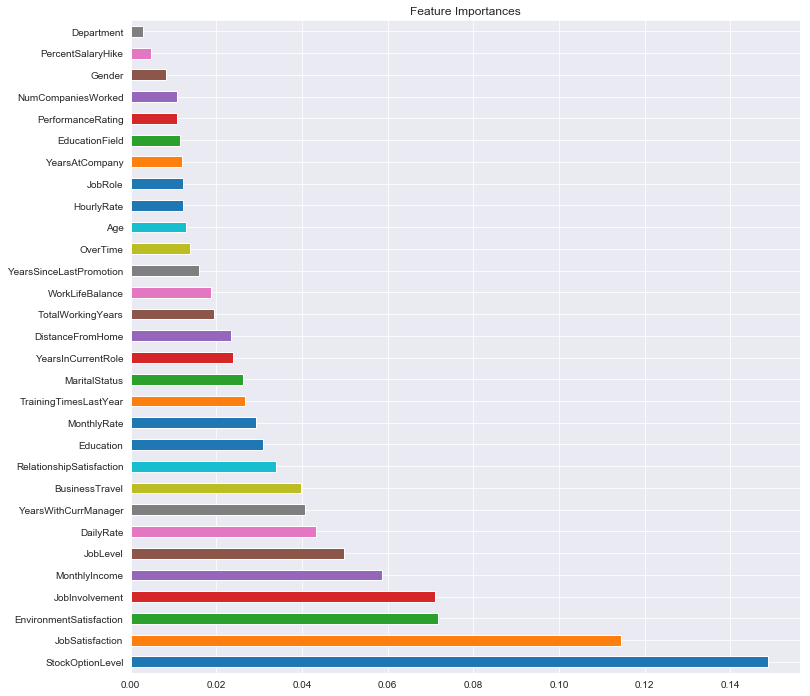

In [93]:
coef1 = pd.Series(gbc.feature_importances_, data.columns).sort_values(ascending = False)
plt.figure(figsize=(12,12))
coef1.plot(kind='barh', title='Feature Importances')

# Support Vector Classification

In [94]:
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

In [95]:
# parameters = {'class_weight': ({0:1, 1:2}, {0:1, 1:2.3}, {0:1, 1:2.6})}
# svm = SVC()
# gs = GridSearchCV(svm, parameters,
#                  scoring = ['roc_auc','recall'],
#                  refit='roc_auc', cv = 10)
# gs.fit(X_train, y_train)
# gs.best_estimator_

In [96]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [97]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
#     ros = RandomOverSampler(random_state=101)
#     X_train, y_train = ros.fit_sample(X_train, y_train)
    smot = SMOTE(random_state=101)
    X_train, y_train = smot.fit_sample(X_train, y_train)
#     adasyn = ADASYN(random_state=101)
#     X_train, y_train = adasyn.fit_sample(X_train, y_train)
    
    #instantiate model
    svm = SVC(class_weight={0: 1, 1: 50}, probability=True)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, svm)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [98]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
dfReport = pd.DataFrame(data=listItem, 
                        columns=['Train Accuracy','Test Accuracy','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])

dfReport

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,1.0,0.867347,1.0,0.5,1.0,0.464481,1.0,0.0,5.078599e-04,0.666962
1,1.0,0.857143,1.0,0.5,1.0,0.461538,1.0,0.0,9.339621e-04,0.668038
2,1.0,0.826531,1.0,0.5,1.0,0.452514,1.0,0.0,8.461680e-03,0.672746
3,1.0,0.840136,1.0,0.5,1.0,0.456562,1.0,0.0,9.890506e-08,0.664027
4,1.0,0.802721,1.0,0.5,1.0,0.445283,1.0,0.0,7.538594e-07,0.669684


In [99]:
for i, tr in zip(range(1,6), train_errors):
    print('Report Train ke ' + str(i) + ' : ')
    print(tr['classreport'])

Report Train ke 1 : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00       978

   micro avg       1.00      1.00      1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956

Report Train ke 2 : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       1.00      1.00      1.00       981

   micro avg       1.00      1.00      1.00      1962
   macro avg       1.00      1.00      1.00      1962
weighted avg       1.00      1.00      1.00      1962

Report Train ke 3 : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       990

   micro avg       1.00      1.00      1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted av

In [100]:
for i, val in zip(range(1,6), validation_errors):
    print('Report Validation ke ' + str(i) + ' : ')
    print(val['classreport'])

Report Validation ke 1 : 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

   micro avg       0.87      0.87      0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Report Validation ke 2 : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       252
           1       0.00      0.00      0.00        42

   micro avg       0.86      0.86      0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.86      0.79       294

Report Validation ke 3 : 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       243
           1       0.00      0.00      0.00        51

   micro avg       0.83      0.83      0.83       294
   macro avg       0.41      0.50      0.45       

Cross Validation Scores : [0.575      0.56       0.535      0.53       0.53       0.545
 0.55       0.53535354 0.53030303 0.53535354]


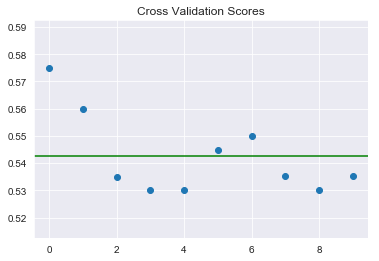

In [101]:
scores = cross_val_score(estimator = svm,
                        X= X_train,
                        y= y_train,
                        cv=10,
                        n_jobs=1)
print('Cross Validation Scores : %s' % scores)

plt.title('Cross Validation Scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g')
plt.show()